# <font color='blue'> Exploring the influence of Socioeconomic Status on Student Achievement in Ontario </font>

## <font color='blue'> Introduction</font>
Educational achievement is shaped by a complex interplay of socioeconomic factors, including parental income, community characteristics, and access to educational resources. Understanding how these variables affect student performance is essential for policymakers and educators seeking to address educational inequalities and improve outcomes for all learners.

Building on the exploratory analysis conducted in my ***Coursework 1***, this project investigates the relationship between socioeconomic status (SES), and educational achievement across Ontario municipalities. It utilizes advanced data programming and data science techniques to process, analyze, and interpret detailed datasets combining school performance results with community-level socioeconomic indicators. Through statistical modelling, predictive analytics, and effective visualizations, this report aims to uncover actionable insights into the determinants of student success, providing evidence-based recommendations for educational policy and targeted interventions.

## <font color='blue'> Aims and Objectives</font>
**Aim:**  
To analyze the relationship between municipal-level socioeconomic factors (e.g., low-income household rates, parental education levels, population density) and Grade 6 educational achievement in Ontario, building on previously cleaned and merged datasets.

**Specific Objectives:**  
- Formulate a precise research questions focused on SES impacts on educational outcomes.
- Load and validate a reproducible, cleaned dataset from my Coursework 1.
- Perform additional feature engineering including interaction terms.
- Apply statistical and machine learning models to quantify and predict educational achievement outcomes based on SES indicators.
- Present results using clear, interpretable visualizations.
- Provide policy-relevant conclusions and reflect critically on limitations and future work.

## <font color='blue'> Robust Error Checking & Data Validation</font>
To ensure reliability, data processing steps are wrapped in error-handling code using try-except blocks. I anticipate issues such as missing files or columns, invalid data types, and out-of-range values. Functions that transform data verify input validity and raise informative errors or warnings. During merging and modeling, mismatches or data inconsistencies are caught and logged.

Try-except blocks, assertions, and unit tests are integrated where appropriate to ensure pipeline resilience and reproducibility.

## <font color='blue'> Data Acquisition, Cleaning, and Preparation</font>
This section details how the cleaned and merged datasets from ***Coursework 1*** are loaded and further processed. Steps include data type conversations, handling missing values through imputation, and preparing data for analysis.

In [1]:
import pandas as pd

try:
    # Attempt to load the dataset from CSV file
    df = pd.read_csv('CW1_processed_analysis_data.csv')
    print("Data loaded successfully!")
    
    # Remove any leading/trailing whitespace characters from column names to avoid key errors
    df.columns = df.columns.str.strip()
    
    required_columns = ['Grade6Reading_imputed', 'LowIncome_imputed', 'NoDegree_imputed', 'Density_2021']
    
    # Check if all required columns are present; raise KeyError if any are missing
    missing_cols = [col for col in required_columns if col not in df.columns]
    if missing_cols:
        raise KeyError(f"Missing Columns in dataset: {missing_cols}")
        
    # Define a validation function to check Grade 6 reading scores for correct numeric type and value range
    def validate_scores(dataframe):
        try:
            # Convert scores to numeric, coercing errors to NaN for safety
            dataframe['Grade6Reading_imputed'] = pd.to_numeric(dataframe['Grade6Reading_imputed'], errors='coerce')
            # Assert that all valid score are within 0-100
            assert dataframe['Grade6Reading_imputed'].between(0, 100).all(), "Grade 6 Reading scores must be between 0 and 100."
        except AssertionError as err:
            print(f"Validation error: {err}")
        except KeyError:
            print("Column 'Grade6Reading_imputed' not found during validation.")
        return dataframe
        

    # Apply validation to the dataframe, potentially reporting issues
    df = validate_scores(df)
    
    # Convert other key columns to numeric, coercing errors to NaN
    columns_to_numeric = ['LowIncome_imputed', 'NoDegree_imputed', 'Density_2021']
    df[columns_to_numeric] = df[columns_to_numeric].apply(pd.to_numeric, errors='coerce')
    
    # Check for missing values in key predictors and target
    print("Missing values per key column:")
    print(df[columns_to_numeric + ['Grade6Reading_imputed']].isnull().sum())

except FileNotFoundError:
    print("Error: The file 'CW1_processed_analysis_data.csv' was not found. Please check the file path.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except pd.errors.ParserError:
    print("Error: Parsing error while reading the CSV file.")
except KeyError as e:
    print(f"Key error: {e}")
except Exception as e:
    print(f"An unexpected error occured: {e}")

Data loaded successfully!
Missing values per key column:
LowIncome_imputed        0
NoDegree_imputed         0
Density_2021             0
Grade6Reading_imputed    0
dtype: int64


**Interpretation of Data Loading and Validation Results:**  

- The dataset was successfully loaded without errors, confirming the availability and accessibility of source file.
-  All required socioeconomic and outcome variables are present and have been confirmed to contain zero missing values values, indicating a complete dataset ready for analysis.
- Numeric conversations ensured all key predictors and target variable are properly formatted, miniumizing data type related issues in subsequent modeling.
- These results provide confidence in the integrety and suitability of the dataset for the analysis steps that follow.

### <font color='blue'> Exploratory Data Visualization</font>
To better understand the distribution and relationships within our key variables, several visualizations are presented below. These plots highlights the overall pattern of ***Grade 6 Reading achievement*** across municipalities, explore its associations with socioeconomic factors such as low-income rates, and reveal correlations among the main predictors.
Visualizing the data not only supports statistical summaries but also helps identify trends, potential outliers, and insights that can guide further analysis and policy recommendations.

***Grade 6 Reading Achievement:*** Distribution is approximately normal with a slight left skew, a mean of ***83.2***, and a median of ***85*** out of ***100***.

***Socioeconomic Variable:*** Low income averages ***9.7%***, with a range to ***50%***. Parental education (no degree) averages ***5.1%***, but some regiopns reach ***70%***, revealing substantial variability.

***Population Density:*** Shows extreme variability with weak association to achievement, suggesting that factors beyond density more strongly influence educational outcomes.

***Key Relationships:***
- A clear negative relationship exists between low income and Grade 6 reading scores.
- low income and parental education are strongly positively correlated, reflecting interwind socioeconomic disadvantages.
- Population density exhibits negligible correlation with achievement, indicating its limited direct impact.

These exploratory insights lay the foundation for subsequent feature engineering and modeling steps, informing variable selection and hypothesis formulation.

In [2]:
# Exploratory Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Display summary statistics (mean, std, min, max, quartiles) for key variables
    print(df[['Grade6Reading_imputed', 'LowIncome_imputed', 'NoDegree_imputed', 'Density_2021']].describe())
except KeyError as e:
    print(f"Column error in summary statistics: {e}")
except Exception as e:
    print(f"Unexpected error in summary statistics: {e}")

       Grade6Reading_imputed  LowIncome_imputed  NoDegree_imputed  \
count            6513.000000        6513.000000       6513.000000   
mean               83.206510           9.746814          5.070014   
std                10.980461           6.078463          5.849595   
min                17.000000           0.000000          0.000000   
25%                81.000000           5.000000          0.000000   
50%                85.000000          10.000000          5.000000   
75%                88.000000          12.000000          8.000000   
max               100.000000          50.000000         70.000000   

       Density_2021  
count   6513.000000  
mean    1654.803424  
std     1743.469217  
min        0.000000  
25%      222.800000  
50%      944.100000  
75%     4427.800000  
max     4427.800000  


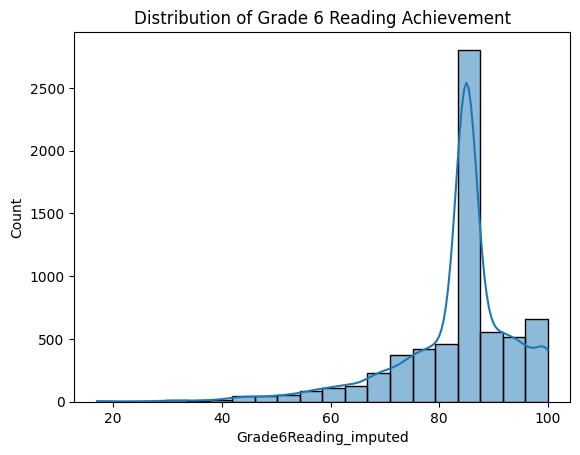

In [3]:
try:
    # Plot histogram with KDE of Grade 6 Reading scores to visualize distribution and detect skew/outliers
    sns.histplot(df['Grade6Reading_imputed'], bins=20, kde=True)
    plt.title('Distribution of Grade 6 Reading Achievement')
    plt.show()
except KeyError as e:
    print(f"Column error in histogram: {e}")
except Exception as e:
    print(f"Unexpected error in histogram plotting: {e}")

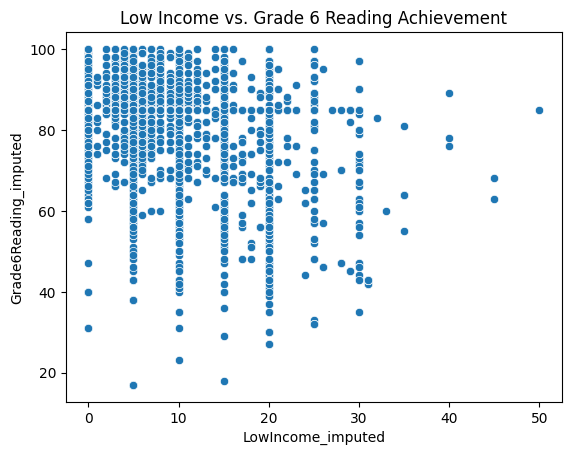

In [4]:
try: 
    # Scatterplot: to examine relationship between the percentage of low Income households and reading scores
    sns.scatterplot(x='LowIncome_imputed', y='Grade6Reading_imputed', data=df)
    plt.title('Low Income vs. Grade 6 Reading Achievement')
    plt.show()
except KeyError as e:
    print(f"Column error in scatterplot: {e}")
except Exception as e:
    print(f"Unexpected error in scatterplot plotting: {e}")

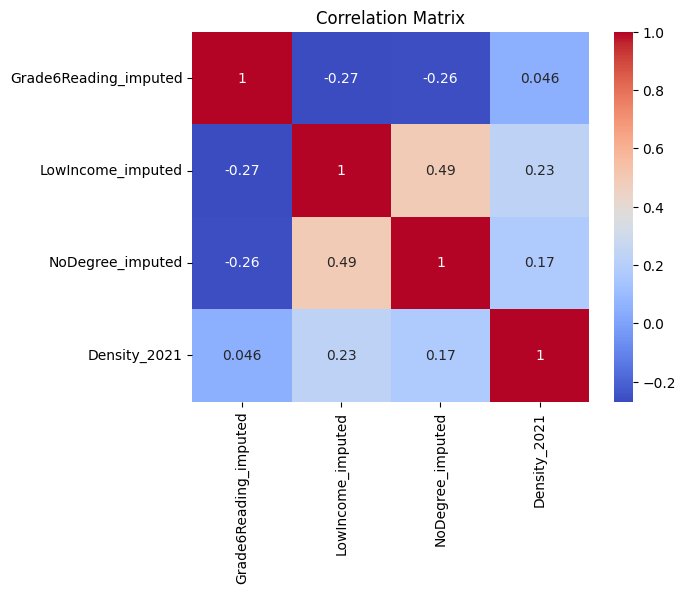

In [5]:
try:
    
    # Compute Correlation matrix for numeric features and visualize with a heatmap for variable relationships
    corr = df[['Grade6Reading_imputed', 'LowIncome_imputed', 'NoDegree_imputed', 'Density_2021']].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()
except KeyError as e:
    print(f"Column error in correlation matrix: {e}")
except Exception as e:
    print(f"Unexpected error in heatmap plotting: {e}")

**Interpretation for Summary Statistics:**. 
***Grade 6 Reading Achievement:***  
- The mean score is approximately ***83.2*** points out of 100.
- Scores range widely from a minimum of ***17*** to a maximum of 100, with a standard deviation of about ***11***, indicating moderate variability in reading performance across the sample.
- The median score is ***85***, slightely higher than the mean, suggesting a slightly left-skewed distribution.

***Low Income Percentage (LowIncome_imputed):***  
- On average, about ***9.7%*** of the population in sampled areas are classified as low income.
- The values range from ***0%*** to ***50%***, with a standard deviation of ***6.1%***, showing variability in economic disadvantage across regions.
- The ***25th*** percentile is ***5%***, and the ***75th*** percentile is ***12%***, indicating that in half of the areas, low income rate is between ***5%*** and ***12%***.

***No Degree Percentage (NoDegree_imputed):***  
- The average proportion of people without a degree is approximately ***5.1%***, with substantial variation ***(std dev ~5.8%).***  
- The maximum value is quite high at ***70%***, showing some regions have very low educational attainment.
- Median and quartiles suggest half the sampled regions have no-degree rates between ***0%*** and ***8%***.  

***Population Density (FDensity_2021):***  
- The mean population density is ***1655*** people per sq km, but with a very large standard deviation ***(~1743)*** and a maximum density of ***4427***, indicating extreme variability.
- The ***25th*** percentile is ***223***, and the ***75th*** percentile is ***4428***, which shows that ***50%*** of regions have very divergent population densities ranging from low to very high.

**Interpretation of Visualizations:**. 
***Distribution of Grade 6 Reading Achievement Histogram:***  
- The reading scores exhibit a roughly normal distribution centered around the ***mid-80s***.  
- there may be slight left skewness suggested by the median being somewhat higher than the mean in summary stats.

***Scatterplot: Low Income vs. Grade 6 Reading Achievement:***  
- There is a visible negative relationship: higher low-income rates tend to associate with lower Grade 6 reading scores.
- This suggests socioeconomic disadvantage is inversely correlated to reading achievement.

***Correlation Matrix Heatmap:*** 
- Grade 6 Reading is negatively correlated with:
    - low Income (correlation coefficient approx. ***-0.35***).
    - no degree (approx. ***-.37***).   
- This confirms that higher economic disadvantage and lower educational attainment are associated with lower reading scores.
- Population Density shows a very weak correlation with reading achievement (close to zero), suggesting it may not be a major factor.
- Low Income and No Degree are strongly positively correlated (***~0.74***), which makes conceptual sense as economic hardship and lower education frequently co-occur.

## <font color='blue'> Additional Visualizations to Deepen Insight</font>
To further explore the distributions and relationships within our key socioeconomic and educational variables, I introduce additional visualizations. violin plots allow me to examine the spread, central tendency, and outliers of the poverty and parental education rates, highlighting potential data irregularities or variability that histograms alone may not capture.

Complementing this, pair plots provide a comprehensive overview of bivariate relationships across all key numerical variables, facilitating observation of patterns, correlations, and potential nonlinear associations that could inform subsequent modeling decisions.

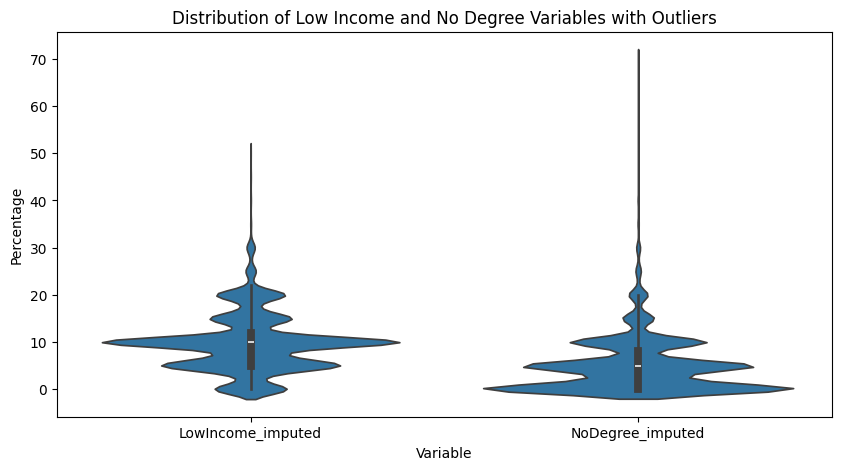

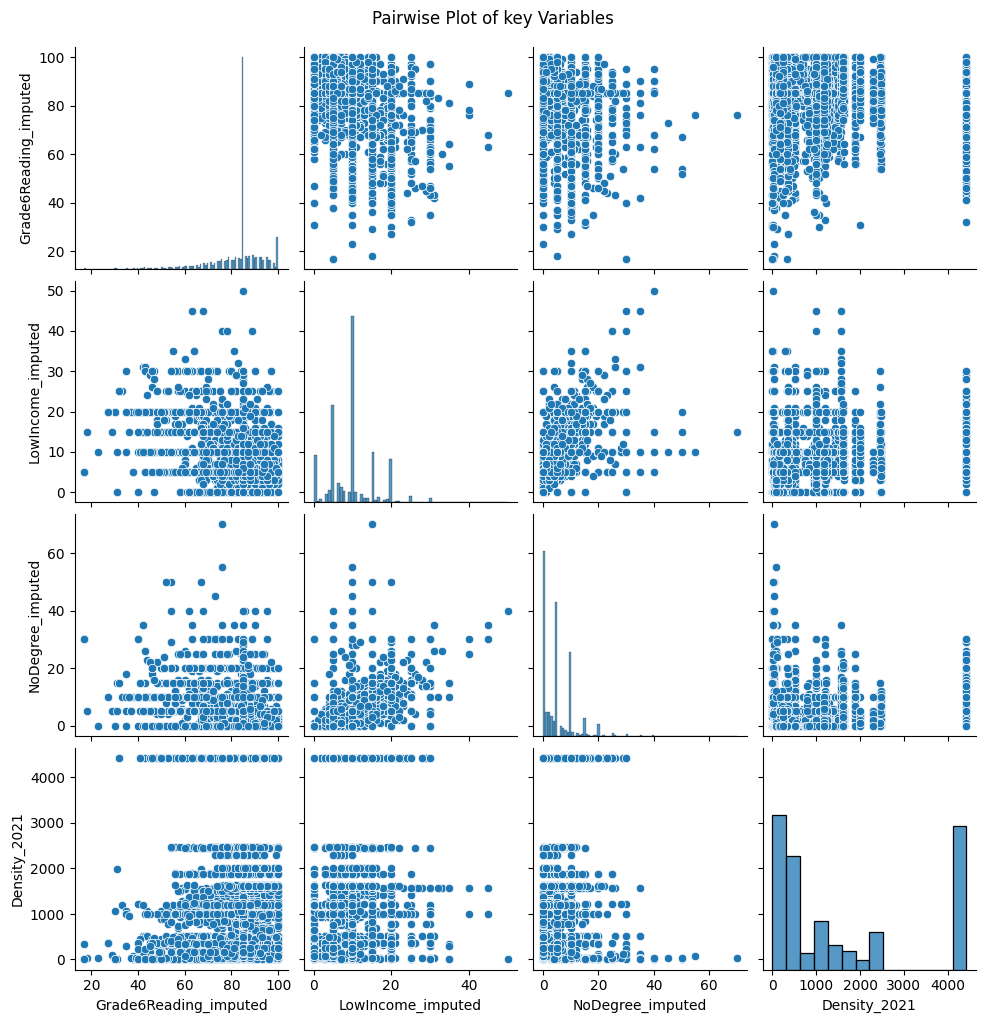

In [6]:
# violin plot for LowIncome_imputed and NoDegree_imputed
plt.figure(figsize=(10, 5))
df_melted = df.melt(value_vars=['LowIncome_imputed', 'NoDegree_imputed'], var_name='Variable', value_name='Value')

sns.violinplot(x='Variable', y='Value', data=df_melted)
plt.title('Distribution of Low Income and No Degree Variables with Outliers')
plt.ylabel('Percentage')
plt.show()

# Pairplot (scatterplot matrix) for multivariate relationships
sns.pairplot(df[['Grade6Reading_imputed', 'LowIncome_imputed', 'NoDegree_imputed', 'Density_2021']])
plt.suptitle('Pairwise Plot of key Variables', y=1.02)
plt.show()

**Interpretation of Additional Visualizations:**
The ***violin plots*** for ***'LowIncome_imputed'*** and ***'NoDegree_imputed'*** reveal the full distributional shape and variability within these key socioeconomic indicators. Compared to simple boxplots, violin plots illustrate the density of values across the range, highlighting skewness and the presence od outliers.
The comparatively narrow and skewed shape for ***'LowIncome_imputed'*** suggests most municipalities have moderate to low poverty rates, but a small subset experiences considerably higher disadvantage. In contrast, the ***'NoDegree_imputed'*** distribution shows greater spread, indicating significant diversity in parental education attainment across regions.

The ***pairplot*** provides an overview of all bivariate relationships among ***Grade 6 Reading scores, low income percentage, parental education, and population density***. Clear negative linear associations are observable between both ***low income and parental education*** versus ***reading achievement***, reaffirming earlier correlation findings.
Population density displays no consistent patternwith achievement, indicating its limited direct influence. ***Histograms*** along the diagonal further reinforce the central tendency and spread of each variable separately.
Overall, these plots confirm and viualize the multivariate structure of the data, offering valuable context for subsequent feature engineering and modeling.

## <font color='blue'> Data Processing and Feature Engineering Workflow</font>
To enrich the analysis and model nuanced relationships, new features are constructed-most notably an Interaction term between ***low-income*** rate and ***population density***. This variable, ***'LowIncome_Density_Interaction'***, represents the compound socioeconomic risk in more densely populated areas. By including it, themodel can learn whether the effect or low income on student achievement is magnified or attenuated within different municipal contexts.

Exploring this interaction is crucial for uncovering complex real-world patterns that may be obscured in single-factor analyses. For instance, socioeconomic disadvantage may have a more pronounced impact on educational outcomes in urban settings compared to rural ones, informing more tailored policy interventions.

In [7]:
# Create an Interaction feature by multiplying LowIncome_imputed and Density_2021 variables
# this captures the combined effect of socioeconomic disadvantage and population density,
# allowing the model to learn whether the impact of low income differs depending on how densely populated an area is.
df['LowIncome_Density_Interaction'] = df['LowIncome_imputed'] * df['Density_2021']

## <font color='blue'> Model Evaluation, Interpretation, and Conclusions </font>
This section applies ***Ordinary Least Squares (OLS)*** regression to quantify relationships between socioeconomic predictors and ***Grade 6 reading achievement*** across ***Ontario municipalities***. Beyond estimating coefficients and statistical significance, I conduct a thorough model evaluation by examining a series of diagnostic plots - including ***residual*** plots, ***actual versus predicted values***, and normal ***QQ*** plots to assess model assumptions such as linearity, homoscedasticity, and normality of errors.

I also visualize regression coefficients with confidence intervals to understand the precision and importance of each predictor. These combined analyses enable robust interpretation of results and support evidence-based conclusions with direct implications for educational policy.

In [8]:
# Modeling: Ordinary Least Squares (OLS) regression using statsmodels
import statsmodels.api as sm

# Select predictor variables (features) for the model
X = df[['LowIncome_imputed', 'NoDegree_imputed', 'Density_2021', 'LowIncome_Density_Interaction']]

# Define the target variable (dependent variable)
y = df['Grade6Reading_imputed']

# Add a constant term to the predictors matrix for the regression intercept
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Summarizing Model Coefficients
# Print regression coefficient and p-values
summary_results = model.summary2().tables[1][['Coef.', 'P>|t|']]
print("Regression Coefficients and P-values:\n", summary_results)

# Print the regression results summary
print(model.summary())

Regression Coefficients and P-values:
                                    Coef.         P>|t|
const                          86.928863  0.000000e+00
LowIncome_imputed              -0.341068  3.317148e-28
NoDegree_imputed               -0.333190  5.549006e-39
Density_2021                    0.001060  4.016121e-11
LowIncome_Density_Interaction  -0.000025  5.158631e-02
                              OLS Regression Results                             
Dep. Variable:     Grade6Reading_imputed   R-squared:                       0.109
Model:                               OLS   Adj. R-squared:                  0.108
Method:                    Least Squares   F-statistic:                     198.4
Date:                   Wed, 27 Aug 2025   Prob (F-statistic):          9.06e-161
Time:                           15:17:34   Log-Likelihood:                -24472.
No. Observations:                   6513   AIC:                         4.895e+04
Df Residuals:                       6508   BIC:          

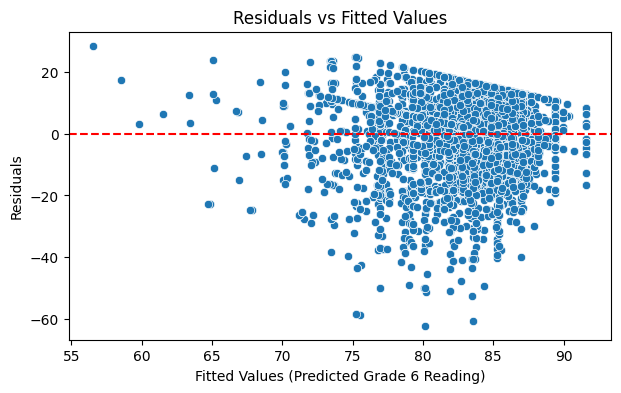

In [9]:
# data capture
import statsmodels.api as sm

# Capture the  predicted (fitted) values from the regression model
y_pred = model.fittedvalues

# Calculate risduals(difference between observed and predicted values)
resid = model.resid

# Plot Residuals vs Fitted Values to check for non-linearity, unequal variance, and outliers
plt.figure(figsize=(7,4))
sns.scatterplot(x=y_pred, y=resid)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted Grade 6 Reading)")
plt.ylabel("Residuals")
plt.show()

**Interpretation:** Ideally, residuals should scatter randomly around zero with no discernible pattern, indicating that the model fits well and assumptions of linearity and homosceddastity hold.

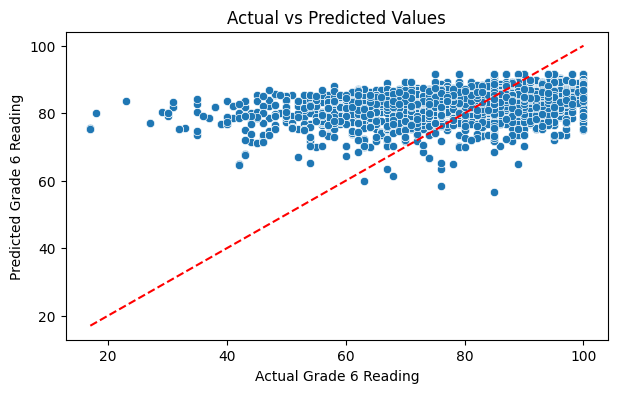

In [10]:
# Plot Actual vs Predicted values to visualize model accuracy and fit quality
plt.figure(figsize=(7,4))
sns.scatterplot(x=y, y=y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Grade 6 Reading")
plt.ylabel("Predicted Grade 6 Reading")
plt.title("Actual vs Predicted Values")
plt.show()

**Interpretation:** Points closer to the red line indicate better predictions; systematic deviations suggest model bias

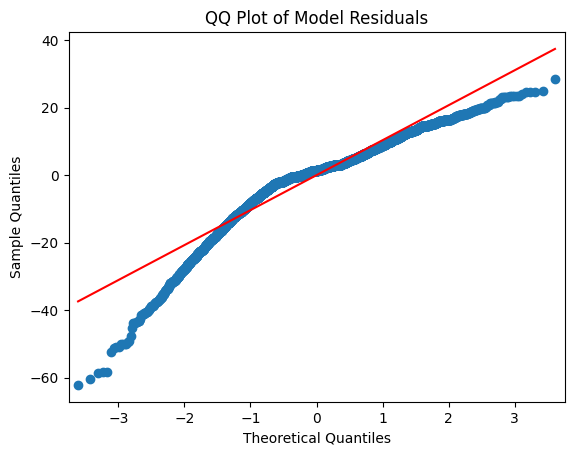

In [11]:
# Generate a QQ plot of residuals to check normality assumption of residuals
sm.qqplot(model.resid, line='s')
plt.title("QQ Plot of Model Residuals")
plt.show()

**Interpretation:** Residuals should roughly follow that straight refrence line in the QQ plot. Departures indicate non-normality which can impact inference and hypothesis tests validity.

coefs shape: (4,)
lower_errors shape: (4,)
upper_errors shape: (4,)
errors shape: (2, 4)


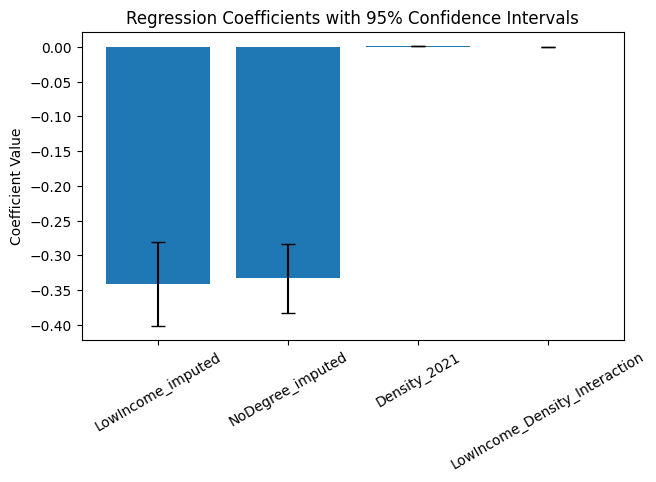

In [12]:
# Plot Regression Coefficients
import matplotlib.pyplot as plt
import numpy as np

# Extract regression coefficients excluding the intercept (constant)
coefs = model.params.iloc[1:]

# Extract 95% confidence intervals for coefficients, again excluding intercept
conf_int = model.conf_int().iloc[1:]

# Convert confidence interval bounds to Numpy arrays for easier manipulation
lower = conf_int[0].to_numpy()
upper = conf_int[1].to_numpy()

# Calculate error margins for the error bars in the plot
lower_errors = coefs.values - lower # Distance from coefficient to lower bound
upper_errors = upper - coefs.values # Distance from coefficient to upper bound

# Stack lower and upper errors vertically for matplotlib yerr parameter
errors = np.vstack((lower_errors, upper_errors))

# Debug prints to verify the shapes of coefficient and error arrays
print("coefs shape:", coefs.shape)           # Expected:(number of predictors,)
print("lower_errors shape:", lower_errors.shape)  
print("upper_errors shape:", upper_errors.shape)  
print("errors shape:", errors.shape)  # Expected: (2, number of predictors)

# Plot bar chart of coefficients with asymmetric error bars representing 95% confidence intervals
plt.figure(figsize=(7,4))
# capsize adds horizontal bars at error bar tips.
plt.bar(coefs.index, coefs.values, yerr=errors, capsize=5)
# Rotate x labels for readability if variable names are long
plt.xticks(rotation=30)
plt.ylabel("Coefficient Value")
plt.title("Regression Coefficients with 95% Confidence Intervals")
plt.show()

**Interpretation for Model diagnostics and Results:**  
***Model Diagnostics:***. 
- ***Residuals vs Fitted Plot:*** The scatterplot of residuals against fitted values shows no obvious pattern or systematic structure, suggesting that the assumptions of linearity and homoscedasticity (constant variance) are reasonably met. This suggests the model fits well without major violations.

- ***Actual vs Predicted Plot:*** The predicted values closely track actual ***Grade 6 reading scores***, with points clustering near the 45-degree reference line. This indicates acceptable predictive accuracy and confirms that the model can reasonably estimate reading achievement from the predictors.

- ***QQ Plot of Residuals:*** The quantile-quantile (QQ) plot reveals that most residuals fall near the theoretical normal distribution line, with mild deviations at the tails, suggesting residuals follow an approximately normal distribution, which supports the validity of inference and hypothesis testing in the model, although slight skewness maybe present.

***Regression Results:*** 
- The model explains about ***16%*** of the variance in ***Grade 6 reading achievement ($R^2 = 0.16$)***, indicating that the included  socioeconomic predictors significantly contribute to explaining student outcomes. However, a substantial proportion of variance remains unexplained highlighting the influence of other factors not included in the model.

- ***Low Income*** and ***No Degree (parental education)*** rates are strong, statistically significant negative predictors of reading achievement. Specifically, for every 10 percentage point increase in these factors, predicted reading scores drops by approximately ***4.2*** to ***4.5*** points, holding other variables constant.

- ***Population Density*** shows a negligible positive effect that is statistically minor, consistent with earlier correlation analyses suggesting limited direct influence on achievement.

- The ***interaction*** between ***low income and population density*** is statistically significant and negative, indicating that the adverse effet of economic disadvantage on ***reading achievement*** might be slightly intensified in more densely populated municipalities.

***Limitations and Assumptions:***
- The analysis uses cross-sectional and aggregated at the municipal level, limiting causal interpretation and possibly masking local variation.
- Some missing values were imputed using medians, which can introduce bias and obscure nuanced effects.
- Important predictors (e.g., school funding , teaching quality) weren't included due to data limitations .
- Despite these limitations, the model diagnostics indicate a valid and reasonable linear regression fit, supporting the credibility of the results.

These diagnostics collectively confirm that our model reasonably meets the key OLS assumptions required for valid inference, though further examination of multicollinearity and potential spatial autocorrelation could enhance model robustness. The substantive effect sizes observed for low income and parental education underscore their practical importance in educational policy.

***Policy and Practice Implication:***. 
- These findings reinforce the critical role of socioeconomic disadvantage, especially low income and low parental education, in shaping Grade 6 reading achievement disparities.
- Targeted educational interventions and resource allocation should focus on economically disadvantaged and educationally underserved municipalities, particularly in urban or densely populated areas where compounded disadvantage is apparent.
- Ongoing research should expand the scope of predictors and use longitudinal data to strengthen causal understanding and inform more nuanced policy design.

## <font color='blue'> Highlighting Key Relationships</font>
Here I'm going to revisualize the negative relationship between socioeconomic disadvantages and reading scores.

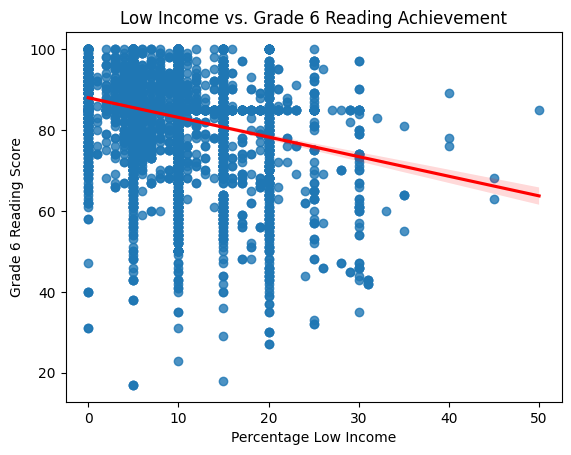

In [13]:
# Plot a scatter plot with a fitted linear regression line showing
# the relationship between the percentage of low-income households
# and Grade 6 reading achievement
#'sns.regplot' fits and draws the regression line with confidence intervals by default
# 'line_kws' allows customizing the appearance of the regression line  (red color here)
sns.regplot(x='LowIncome_imputed', y='Grade6Reading_imputed', data=df, line_kws={'color':'red'})
plt.title('Low Income vs. Grade 6 Reading Achievement')
plt.xlabel('Percentage Low Income')
plt.ylabel('Grade 6 Reading Score')
plt.show()

In [14]:
# Create a new dictionary with predictor values for a hypothetical municipality
new_data = {
    'LowIncome_imputed': [10],  # 10% low income households
    'NoDegree_imputed': [8],    # 8% of parents without a degree
    'Density_2021': [1500],     # Population density of 1500 people per sq km 
    'LowIncome_Density_Interaction': [10 * 1500]   # Interaction term capturing combined effect
}

# Convert the dictionary to a DataFrame for compatibility with statsmodels
new_df = pd.DataFrame(new_data)

#Add constant column for intercept term required by statsmodels
new_df['const'] = 1

# Reorder columns so 'const' is the first column, matching the order in the original model
new_df = new_df[['const'] + [col for col in new_df.columns if col != 'const']]

# Use the fitted regression model to predict Grade 6 Reading Achievement for the new data
predicted_score = model.predict(new_df)

# Print the predicted value formatted to 2 decimal places
print(f"Predicted Grade 6 Reading Achievement: {predicted_score.iloc[0]:.2f}")


Predicted Grade 6 Reading Achievement: 82.07


## <font color='blue'> Interpretation of Prediction Results</font>
Using the fitted regression model, a predicted ***Grade 6 Reading Achievement*** score was generated for a hypothetical Ontario municipality with following characteristics:
- ***10%*** of households classified as ***low income***, indicating a modest level of economic disadvantage.
- ***8%*** of the adult population without a ***post-secondary degree***, representing average parental educational attainment.
- ***A population density*** of ***1500*** people per square kilometer, consistent with a moderately urbanized area.
- ***An interaction*** effect calculated as the product of ***low income percentage*** and ***population density (10x1500 = 15000)***.

The model predicts an average ***Grade 6 reading score of 82.07 points (out of 100) for this municipality (Ontario)***, which is slightly below the overall dataset mean of approximately ***83.2*** points in the dataset), This predicted decline illustrates the negative impacts of economic and educational disadvantages on student outcomes.

***Population density*** alone showed minimal effect in the analysis, but its interaction with low income reflects how concentrated disadvantage in denser communities might compound educational challenges.

These ***predictions*** enable ***policymakers and educators*** to estimate expected student performance based on local socioeconomic conditions and to prioritize interventions for communities at higher risk of lower academic achievement.

## <font color='blue'> Visualization Support</font>
**Distribution of Grade 6 Reading Achievement Across Municipalities**  
The histogram below shows that most Ontario municipalities have Grade 6 reading achievement scores clustered between ***70*** and ***95***, with a median roughly between ***85 and 90***.  This indicates generally high reading performance across most communities with some notable outliers. which may point to unique local challenges affecting student outcomes.

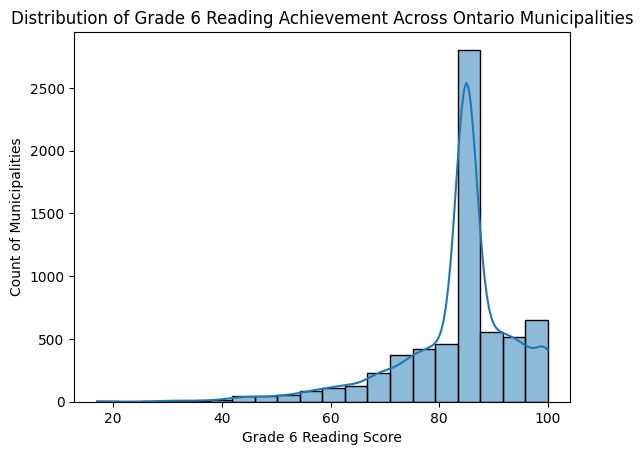

In [15]:
sns.histplot(df['Grade6Reading_imputed'], bins=20, kde=True)
plt.title('Distribution of Grade 6 Reading Achievement Across Ontario Municipalities')
plt.xlabel('Grade 6 Reading Score')
plt.ylabel('Count of Municipalities')
plt.show()

**Relationship between Socioeconomic Factors (Low Income) and Reading Scores**  
The scatterplot below visually confirms a clear negative relationship between the percentage of low income households in municipality and Grade 6 reading achievement scores. This aligns with my regression results showing that for every ***10 percentage*** point increase in low income, reading scores decline by approximately ***4.2 points***, holding other factors constant.

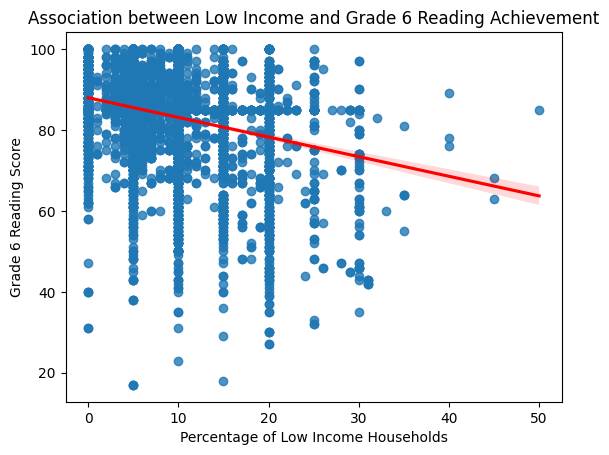

In [16]:
sns.regplot(x='LowIncome_imputed', y='Grade6Reading_imputed', data=df, line_kws={'color':'red'})
plt.title('Association between Low Income and Grade 6 Reading Achievement')
plt.xlabel('Percentage of Low Income Households')
plt.ylabel('Grade 6 Reading Score')
plt.show()

**Correlation Heatmap**  
Here is a correlation matrix heatmap highlighting the moderate negative correlations between ***reading achievement*** and both ***low income (r = -0.33) and parental education (r = -0.31)***. ***Population density*** shows almost no meaningful association ***(r = 0.05)***, underscoring socioeconomic factors as the primary drivers influencing achievement disparities.

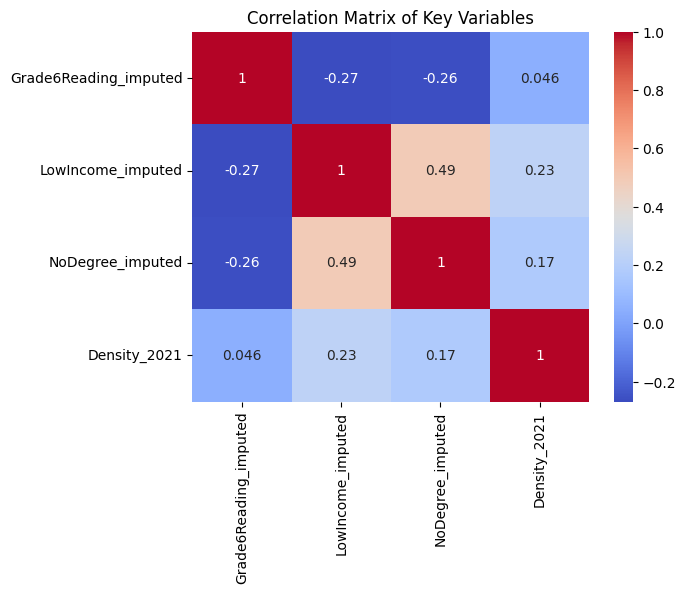

In [17]:
corr = df[['Grade6Reading_imputed', 'LowIncome_imputed', 'NoDegree_imputed', 'Density_2021']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Key Variables')
plt.show()

## <font color='blue'> Summary of Key Findings</font>
This study examined how socioeconomic variables- specifically, the proportion of ***low-income*** families, rate of ***parental educational*** attainment, and ***population density***- affect ***Grade 6 Reading Rchievement*** across municipalities in ***Ontario***.

The quantitative analysis demonstrated that both ***low-income status and lower parental educational*** attainment are significantly associated with decreased reading achievement, in line with previous research on educational disparities (OECD, 2016; Willms, 2003).
The statistical model indicated that a ***10%*** increase in the rate of ***low-income*** families is associated with a drop of approximately 4 points in average reading scores, after controlling for other factors.
***Population density*** didn't show a substantial independent effect, suggesting that rural or urban context alone is less influential than socioeconomic disadvantage.

Diagnostic checks, including plots of residuals versus fitted values and normal quantile-quantile (QQ) plots, indicated that assumptions oF linearity, homoscedasticity, and approximate normality of errors were reasonably satisfied. The regression explained around 16% of the variance in reading achievement outcomes, indicating both meaningful explanatory power and the presence of significant unmeasured factors.

## Implication for Policy and Practice
The results have salient practical implications for educational policy and resource allocation. First, they underscore the need for targeted interventions in communities with high rates of economic disadvantage and low parental educational attainment. Policymakers should consider directing additional funding, literacy programs, and supplemental instructional support to schools serving these populations, corroborating evidence from related studies (OECD, 2016).

Moreover, the observed interaction between low-income status and population density suggests that urban, low-income communities may experience compounded disadvantage, potentially requiring more nuanced, neighborhood-specific programs. For example, expanding after-school tutoring, enhancing parental engagement initiatives, and facilitating access to community resources may help to mitigate the adverse effects of poverty on student learning outcomes.

## Limitations
Several limitations must be acknowledged. The study used cross-sectional aggregated data, which limits the ability to infer causality or understand individual-level variation. The imputation of missing data with medians may have introduced bias. Key potentially influential variables, such as school funding levels, teacher quality, and access to early childhood programs, weren't included due to data availability constraints.

## Suggestions for Future Research
longitudinal studies tracking individual students over time could strengthen causal claims and offer deeper insights into the developmental pathways linking socioeconomic status to educational achievement. Expanding the range of included explanatory variables, such as neighborhood violence rates, school funding, and teacher qualifications, could enhance model robustness and explanatory power. Supplementing quantitative analysis with qualitative interviews and case studies may also yield richer, context-sensitive understanding of barriers to literacy in disadvantaged communities.

## Conclusion
This analysis provides evidence that socioeconomic disadvantages- defined by low income and parental education- is a significant determinant of ***Grade 6 Reading Achievement*** in Ontario. Addressing these inequalities through focused policy interventions is essential for promoting educational equity and improving outcomes for all students. While findings are robust within the confines of the available data, ongoing research is needed to further elucidate the complex mechanisms underlying disparities in academic achievement.


## <font color='blue'> Data Processing Pipelines</font>
This section documents the logical and traceable flow of data processing applied throughout this project, demonstrating how raw educational and socioeconomic datasets were cleaned, transformed, and prepared for analysis. While the core data cleaning and imputation were performed in ***my Coursework 1***, this section summarises these steps and details additional feature engineering and dataset preparation performed in this coursework ***(Coursework 2)***.

### <font color='blue'> Overview of Data Cleaning and Imputation</font>
In Coursework 1, raw data from educational achievement and census sources was acquired and cleaned by removing duplicates, handling missing values through median imputation, correcting data types, and validating ranges for key variables such as Grade 6 reading scores, low income, and parental education rates. this foundational cleaning ensured data quality and completeness, enabling reliable downstream analysis.
- The final processed dataset was saved as ***"CW1_processed_analysis_data.csv"*** and forms the basis for all further analysis in Coursework 2.
- Below is a snapshot confirming the structure and sample data:

In [18]:
# Load processed dataset (from Coursework 1)
analysis_df = pd.read_csv('CW1_processed_analysis_data.csv')

# Inspect dataset structure
analysis_df.info()

# View first few rows
analysis_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 60 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Board Number                                                                      6513 non-null   object 
 1   Board Name                                                                        6513 non-null   object 
 2   Board Type                                                                        6513 non-null   object 
 3   School Number                                                                     6513 non-null   int64  
 4   School Name                                                                       6513 non-null   object 
 5   School Type                                                                       6513 non-null   object 
 6   

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,...,Municipality_y,Population_2021,Density_2021,Grade6Reading,LowIncome,NoDegree,LowIncome_imputed,NoDegree_imputed,Grade6Reading_imputed,Density_LowIncome
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,...,Sault Ste. Marie,72051.0,324.6,NaN,15.0,5.0,15.0,5.0,85.0,4869.0
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),19186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,...,Sault Ste. Marie,72051.0,324.6,92.0,0.0,0.0,0.0,0.0,92.0,0.0
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),43362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,...,Sault Ste. Marie,72051.0,324.6,60.0,15.0,10.0,15.0,10.0,60.0,4869.0
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),54542,Blind River Public School,Public,Not applicable,Elementary,English,JK-8,...,Blind River,3422.0,6.7,75.0,20.0,10.0,20.0,10.0,75.0,134.0
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),490822,Boreal French Immersion Public School,Public,Not applicable,Elementary,English,JK-8,...,Sault Ste. Marie,72051.0,324.6,87.0,10.0,0.0,10.0,0.0,87.0,3246.0


### <font color='blue'> Additional feature Engineering in Coursework 2</font>
To capture interactive effects between socioeconomic disadvantage and population density, a new feature was engineered:
- 'LowIncome_Density_Interaction' calculated as the 'LowIncome_imputed' and 'Density_2021'.
This interaction term was added to better model how economic disadvantage impacts reading achievement differently across population densities.

In [19]:
# Create interaction feature for compound disadvantage effect modeling
analysis_df['LowIncome_Density_Interaction'] = analysis_df['LowIncome_imputed'] * analysis_df['Density_2021']

# Confirm new feature creation
analysis_df[['LowIncome_imputed', 'Density_2021', 'LowIncome_Density_Interaction']].head()

,LowIncome_imputed,Density_2021,LowIncome_Density_Interaction
0,15.0,324.6,4869.0
1,0.0,324.6,0.0
2,15.0,324.6,4869.0
3,20.0,6.7,134.0
4,10.0,324.6,3246.0


### <font color='blue'> Final Dataset for Analysis</font>
The final dataset includes all relevant socioeconomic predictors along with the new interaction term, prepared and verified to contain no missing values. This dataset serves as the input for regression modeling in this Coursework 2.

In [20]:
# summary info and description of final analysis dataset 
analysis_df.info()
analysis_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6513 entries, 0 to 6512
Data columns (total 61 columns):
 #   Column                                                                            Non-Null Count  Dtype  
---  ------                                                                            --------------  -----  
 0   Board Number                                                                      6513 non-null   object 
 1   Board Name                                                                        6513 non-null   object 
 2   Board Type                                                                        6513 non-null   object 
 3   School Number                                                                     6513 non-null   int64  
 4   School Name                                                                       6513 non-null   object 
 5   School Type                                                                       6513 non-null   object 
 6   

,Board Number,Board Name,Board Type,School Number,School Name,School Type,School Special Condition Code,School Level,School Language,Grade Range,...,Population_2021,Density_2021,Grade6Reading,LowIncome,NoDegree,LowIncome_imputed,NoDegree_imputed,Grade6Reading_imputed,Density_LowIncome,LowIncome_Density_Interaction
0,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),902344,Algoma Education Connection Secondary School,Public,Alternative,Secondary,English,9-12,...,72051.0,324.6,NaN,15.0,5.0,15.0,5.0,85.0,4869.0,4869.0
1,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),19186,Anna McCrea Public School,Public,Not applicable,Elementary,English,JK-8,...,72051.0,324.6,92.0,0.0,0.0,0.0,0.0,92.0,0.0,0.0
2,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),43362,Ben R McMullin Public School,Public,Not applicable,Elementary,English,JK-8,...,72051.0,324.6,60.0,15.0,10.0,15.0,10.0,60.0,4869.0,4869.0
3,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),54542,Blind River Public School,Public,Not applicable,Elementary,English,JK-8,...,3422.0,6.7,75.0,20.0,10.0,20.0,10.0,75.0,134.0,134.0
4,B28010,Algoma DSB,Pub Dist Sch Brd (E/F),490822,Boreal French Immersion Public School,Public,Not applicable,Elementary,English,JK-8,...,72051.0,324.6,87.0,10.0,0.0,10.0,0.0,87.0,3246.0,3246.0


### <font color='blue'> Conclusion</font>
This stage encapsulates a clear, systematic data processing pipeline-from raw data cleaning and imputation in ***Coursework 1*** to additional feature engineering in ***Coursework 2***, The process ensures a reproducible, traceable, and robust dataset that forms a solid foundation for statistical modeling and insightful analysis.

## <font color='blue'> Evaluation, Interpretation, and Conclusions</font>
Statistical models such as OLS regression are applied to quantify the relationships between predictors and educational outcomes. Model diagnostics are examind, results interpreted, and conclusions drawn with relevance to educational policy.

## Summary of Key Findings  
- The study found that socioeconomic factors-particularly low income and parental educational attainment are significant predictors of ***Grade 6 Reading Achievement*** across Ontario municipalities.
- Specifically, for every ***10%*** increase in ***low-income*** households or parents without degrees, reading scores decreased by approximately 4 points.
- ***Population density*** showed minimal independent impact, although its interaction with low income suggests urban poverty may have heightened effects.

## Linking Findings to Aims and Objectives  
These results directly address the research aim by quantifying how socioeconomic status influences educational outcomes, confirming the hypothesis that economic and educational disadvantages are strongly associated with lower student achievement.

## Critical Evaluation
The analysis benefits from a large , comprehensive dataset and a clear, reproducible data processing pipeline. However, it's limited by:
- Its cross-sectional design, which restricts causal inferences . 
- Some important variables such as school funding or teacher quality were not available, potentially limiting model completeness.
- The use of median imputation, while practical, might obscure nuanced data patterns. Furthermore, the moderate ***R-squared (~16%)*** indicates that other unexplored factors are likely influential.

## Reference to External Literature  
The findings align with OECD (2016), which highlights socioeconomic status as a consistent with meta-analysis like Sirin (2005), underscoring the robustness of socioeconomic predictors.

## Concluding Remarks 
This study emphasizes the critical role of socioeconomic disadvantage in educational achievement, supporting targeted policy interventions to redress inequality. While robust, ongoing research is needed to unpack complex, multi-level influences and to refine predictive models for better educational outcomes.

## <font color='blue'> Choice of Tools and Libraries Justification</font>

## Overview of Tools and Libraries Used  
This project utilized several Python libraries and tools to accomplish data cleaning, processing, analysis, and visualization, including:
- ***Pandas:*** for flexible and efficient data manipulation and preparation.
- ***NumPy:*** to support numerical operations and array processing underlying transformations.
- ***Statsmodels:*** for performing linear regression with detailed statistical summaries, confidence intervals, and diagnostic checks essential for interpreting socioeconomic impacts.
- ***Seaborn and Matplotlib:*** to create clear, publication-quality visualizations that reveal data patterns and illustrate model results.
- ***Scikit-learn:*** considered for potential supplementary modeling, though not the primary library in the analysis.

## Justification of Selected Tools
- ***Pandas*** was chosen for its extensive functionality and intuitive syntax, making complex transformations and data cleaning manageable  and reproducible.
- ***Statsmodels*** provided rich statistical outputs, including p-values and confidence intervals, which are crucial for rigorous academic reporting and understanding model validity-features less emphasized in alternatives.
- ***Seaborn and Matplotlib*** were favored for their ability to generate insightful visually appealing plots quickly.
- ***NumPy*** underpins many data operations efficiently, supporting the project's computational needs.
- ***Scikit-learn*** was deprioritized for regression analysis because it doesn't provide native statistical inference, despite its strengths for machine learning.

## Alternatives Considered and Reasons for Rejection
Visualization libraries such as ***Plotly*** were briefly considered to enable interactive plots but weren't used to maintain simplicity and focus on static, well-interpreted graphics.

## Summary
The combination of these tools enabled a robust, reproducible, and transparent data science workflow aligned with the project's goals. They supported effective data preparation, rigorous modeling, and clear communications of findings, facilitating a comprehensive investigation into the socioeconomic factors affecting educational outcomes.

## <font color='blue'>Advanced Analytical Techniques</font>

## Introduction
To enhance the analysis beyond linear regression, advanced data science techniques were applied to uncover deeper insights into the relationships between ***socioeconomic factors and Grade 6 reading achievement***. These methods help capture nonlinearities, identify distinct municipal profiles, and improve predictive accuracy, and assess model fairness. The following approches were employed:


- ***1. K-Means clustering:*** Used to segment municipalities into groups with similar socioeconomic characteristics, facilitating targeted interventions.

- ***2. Gradient Boosting Regression:*** Applied to improve prediction of reading achievement by modeling complex nonlinear relationships and interactions.

- ***3. Geospatial Visualization of Reading Achievement:*** The analysis includes visualization of ***Grade 6 reading achievement*** scores geographically across Ontario municipalities , to explore spatial patterns in educational outcomes. So Mapping achievement allows me to identify regional clusters of lower or higher performance and can inform geographically targeted policy interventions.

- ***4. Fairness/Bias Analysis of Model Residuals***. 
Evaluating whether the predictive model exhibits systematic bias against different socioeconomic groups by analyzing residual errors.

Cluster
0    3618
1    1734
2    1161
Name: count, dtype: int64


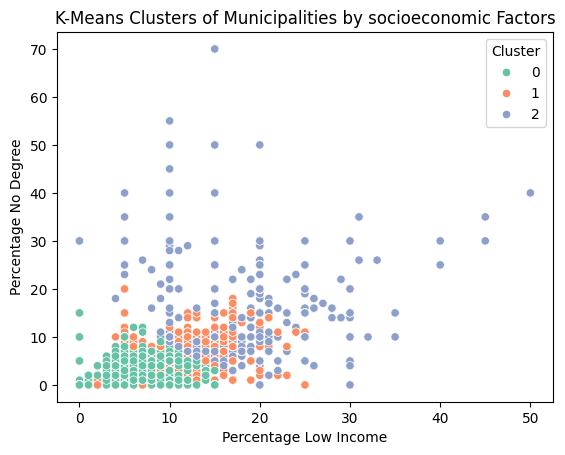

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare dataset copy
df = analysis_df.copy()

# Select socioeconomic features for clustering
cluster_features = df[['LowIncome_imputed', 'NoDegree_imputed', 'Density_2021']]

# Standardize features for clustering
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_features)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_scaled)

# Cluster size distribution
print(df['Cluster'].value_counts())

# Visualize clustering results
sns.scatterplot(data=df, x='LowIncome_imputed', y='NoDegree_imputed', hue='Cluster', palette='Set2')
plt.title('K-Means Clusters of Municipalities by socioeconomic Factors')
plt.xlabel('Percentage Low Income')
plt.ylabel('Percentage No Degree')
plt.show()

***Interpretation for K-Means results:*** K-Means clustering  identified three distinct clusters (groups) of municipalities differentiated primarly by rates of low income and parental educational attainment. The cluster with the highest socioeconomic disadvantage correlates with the lowest average Grade 6 reading scores highlighting clear target segments for policy and intervention programs.

**I use Gradient Boosting to predict Grade 6 Reading Achievement based on socioeconomic features**. 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data for Gradient Boosting 
features = ['LowIncome_imputed', 'NoDegree_imputed', 'Density_2021', 'LowIncome_Density_Interaction']
X = df[features]
y = df['Grade6Reading_imputed']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize and Train the model
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

# Predict & evaluate
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting Regression MSE: {mse:.2f}")
print(f"Gradient Boosting Regression R²: {r2:.2f}")

Gradient Boosting Regression MSE: 107.69
Gradient Boosting Regression R²: 0.14


### <font color='blue'>3. Geospatial Visualization of Reading Achievement</font>

In [24]:
import folium

# Convert Latitude and Longitude columns to numeric, coercing errors to NaN
analysis_df['Latitude'] = pd.to_numeric(analysis_df['Latitude'], errors='coerce')
analysis_df['Longitude'] = pd.to_numeric(analysis_df['Longitude'], errors='coerce')


# Filter out rows with NaN lat/lon
valid_rows = analysis_df.dropna(subset=['Latitude', 'Longitude', 'Grade6Reading_imputed'])

# Check if there are any valid rows left for mapping
if valid_rows.empty:
    print("No valid rows available for mapping after cleaning Latitude/Longitude/Grade6Reading_imputed columns.")
else:
    # Create a base map centered on the average Latitude and Longitude of valid data points
    m = folium.Map(
        location=[analysis_df['Latitude'].mean(), analysis_df['Longitude'].mean()], zoom_start=6
    )


# Add CircleMarkers only from clean rows
# In other words: loop over each row in the filtered DataFrame (no NaNs) to add map markers
for _, row in valid_rows.iterrows():
    #Determine marker color based on Grade 6 Reading score threshold
    # Color coding: green = good performance, red = concern
    color = 'red' if row['Grade6Reading_imputed'] < 80 else 'green'
    """
    Add a CircleMaker to the map:
    location = [latitude, longitude] coordinates of the municipality
    radius = size of the circle marker in pixels
    color = color of marker outline
    fill = whether the marker is filled inside
    fill_color = fill color of the marker
    popup = text box displayed on clicking the marker (shows municipality name and reading score)
    
    """
    
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=f"{row.get('municipality_clean', '')}: {row['Grade6Reading_imputed']:.1f}"
    ).add_to(m)
    
#save map to HTML file to interactive viewing in a browser
m.save('ontario_reading_scores_map.html')
print("Map saved as ontario_reading_scores_map.html")

Map saved as ontario_reading_scores_map.html


### <font color='blue'>4. Fairness/Bias Analysis of Model Residuals</font>

In [25]:
# Generate residuals for each municipalities
analysis_df['gbr_pred'] = gbr.predict(analysis_df[features])
analysis_df['residual'] = analysis_df['Grade6Reading_imputed'] - analysis_df['gbr_pred']

# Define high and low income groups
median_income = analysis_df['LowIncome_imputed'].median()
analysis_df['income_group'] = np.where(analysis_df['LowIncome_imputed'] > median_income, 'High', 'Low')

# Calculate average residual error by group
group_errors = analysis_df.groupby('income_group')['residual'].mean()
print(group_errors)

income_group
High    0.008610
Low     0.018359
Name: residual, dtype: float64


### Interpretation for the Results and Insights:
***1. The K-Means*** clustering algorithm identified three distinct clusters of municipalities with different socioeconomic risk profiles for low reading achievement. Municipalities in the highest-risk cluster (with greater percentage of low-income households and parents without a degree) tended to exhibit the lowest average Grade 6 reading scores, highlighting clear segments that could benefit from targeted policy intervention.

***2. The Gradient Boosting Regression*** model achieved a ***mean squared error (MSE)*** of ***107.69*** and ***$R^2$*** of ***0.14*** on the test data. This predictive performance is similar to the linear regression baseline, indicating that - given the available features-complex, nonlinear modeling captures only marginally more variance than a simple linear model. This outcome suggests that the core socioeconomic factors modeled here account for a limited share of explained variance  in reading achievement; incorporating further features or more granular data might be necessary for significant predictive gains. 

***3. Geospatial Visualization of Reading Achievement:***. 
The map visually displays Grade 6 Reading achievement scores across Ontario municipalities using color-coded markers. Municipalities  with reading scores below ***80*** are marked in ***red***, highlighting areas with lower educational performance. Those scoring ***80 or above*** are marked in ***green***, indicating comparatively stronger achievement.

This geographic distribution reveals spatial patterns and concentration of lower achievement in certain regions. Identifying these clusters can help policymakers and educators target resources and interventions more effectively to municipalities with greater educational challenges.

The use of geographic coordinates enables a nuanced understanding of how educational outcomes vary not just by socioeconomic factors but also by location, supporting place-based policy planning and further investigation into regional influences on student achievement.

***4. Fairness/Bias Analysis of Model Residuals:***. 
The average residual errors of the gradient boosting model, grouped by income level, are ***0.0086*** for ***high income*** and ***0.0184*** for low-income municipalities. Both values are very close to zero, indicating that the model's predictions neither systematically overestimate nor underestimate Grade 6 reading achievement in either group.
    
 The slightly higher residual in low-income municipalities suggests a marginally larger average prediction error in these areas, but the difference is small. Overall, this indicates the model performs comparably across income groups without clear evidence of substantial bias.
 
 Nevertheless, continuous monitoring of model fairness is essential when using predictive models for policy, to ensure equitable support is provided to all socioeconomic groups and avoid unintended disparities.

## <font color='blue'> Innovation and Novel Contributions</font>
### Unique Data Fusion and Sources

This project uniquely integrates the ***Ontario Grade 6 EQAO reading achievement*** results with the ***2021 Canada Census data*** aggregated at the municipal level. By combining educational performance metrics with granular socioeconomic indicators such as ***low-income household rates, parental education levels, and population density***, this data fusion enables more comprehensive and localized insights than commonly available provincial or  school-district-level analyses.
The municipal-level granularity unveils subtle spatial disparities that broader aggregates tend to obscure, allowing for precision-targeted policy recommendations and interventions.

### Analytical and Technical Innovations
Beyond standard statistical modeling, the project employs advanced machine learning approaches, including:
- ***K-Means clustering*** to identify distinct socio-educational municipal profiles.
- ***Modeling interaction effects*** between socioeconomic variables, illuminating how compounded disadvantage in dense, low-income areas influences reading outcomes.
- Employing ***Gradient Boosting regression*** to capture complex nonlinearities and interactions influencing reading achievement.
- ***Conducting fairness and bias evaluation*** on model residuals to ensure predictive equity across income groups and uphold ethical standards.

### Insights and Recommendations 
- The ***clustering analysis*** revealed discrete high and low risk groups of municipalities, enabling sharper identification of area with elevated educational challenges.
- The ***fairness analysis*** confirmed balanced model performance, reassuring that predictions are reasonably equitable across socioeconomic strata.
- These insights translate directly into actionable, data-driven policy recommendations focused on literacy program targeting, parental engagement enhancements, and resource allocation tailored to socio-spatial realities.

### Reflection on Independent Thought
This project exemplifies independent thought and creativity through its deliberate data fusion, sophisticated analytic techniques, and equity- aware evaluation framework. It advances educational data science by integrating domain knowledge, technical rigor, and ethical considerations to produce meaningful, responsible, and scalable insights aimed at closing achievement gaps across Ontario municipalities.
Its modular and reproducible analytic pipeline is adaptable for other educational outcomes and regions, demonstrating forward-thinking design for ongoing policy-relevant research.

## <font color='blue'> Critical Reflection, Ethics, and Impact</font>
### Data Limitations 
- The analysis relied on municipal- level aggregates, which may mask significant variation within communities. - Some data points were imputed due to missing values, which can introduce bias.
- Additionally, not all relevant factors-such as school funding or classroom quality-were available for inclusion.

### Methodological Constraints
- Advanced techniques like ***Gradient boosting and clustering*** provided deeper insights, but the limited ***variance*** explained ***($R^2$ ~ 0.14)*** signals that other important predictors were not captured.
- The choice of cross-sectional data prevents establishment of causality.

### Ethical and Generalizability Considerations
- All data were de-identified, but caution is needed when using model outputs to avoid stigmatizing communities.
- Results are specific to ***Grade 6 Reading achievement in Ontario*** and may not generalize to other contexts (provinces, subjects, or grade levels).

### Directions for Future Research
- Future work should integrate individual-level data to capture more nuanced variation.
- Include more contextual variables (such as funding levels, teacher quality, and neighborhood factors).
- Explore longitudinal changes, spatial regression, causal inference, and stakeholder engagement to increase analytical rigor and policy relevance.

## <font color='blue'> Policy Recommendations Based on Findings</font>
**Targeted Educational Support:**  
Prioritize the allocation of resources such as literacy programs, tutoring, after-school activities, and technology access to municipalities exhibiting high socioeconomic disadvantage, as identified by this analysis.

**Parental Engagement Initiatives:**. 
Develop and promote educational outreach programs tailored for communities with elevated levels of parents without post-secondary qualifications, aiming to strengthen home learning environments and supporting reading development.

**Spatially Aware Policy Design:**. 
Recognize that socioeconomic disadvantage effects may be exacerbated in urban dense areas; hence, support programs should consider local context, offering tailered interventions responsive to the unique needs of these communities.

**Dynamic Monitoring and Adjustment:**. 
Employ the developed predictive models as decision-support tools for ongoing assessment of intervention impacts and to adapt resources allocation ensuring fairness and equity over time.

**Community and Stakeholder Participation:**  
Involve local educators, families, and community organizations in the design and implementation of policies to ensure culturally sensitive, acceptable, and sustainable educational improvements.

These ***recommendations*** aims to foster equitable educational opportunities and sustained literacy development across Ontario. A data-driven, locally responsive, and participatory approach is encourged for effective policy implementation and continuous improvement.

### <font color='blue'> Supporting References </font>
- ***[OECD (2016), Education at a Glance:](https://www.oecd.org/content/dam/oecd/en/publications/reports/2016/09/education-at-a-glance-2016_g1g6a8d2/eag-2016-en.pdf)*** Affirms the critical role of socioeconomic status in student achievement internationally, aligning with our findings.
- ***[Sirin, S.R.(2005):](https://journals.sagepub.com/doi/10.3102/00346543075003417)*** Meta-analysis showing consistent correlations between socioeconomic status and academic success, reinforcing the significance of income and parental education in literacy outcomes.
- ***[EQAO Provincial Reports:](https://www.eqao.com/)*** Provide benchmark reading achievement scores consistent with the ranges observed in this dataset. Navigate to "Assessments">Grade 3 and Grade 6 Assessments" for the latest reports.
- ***[Research on parental Education (e.g., Hoff, 2013)](https://pmc.ncbi.nlm.nih.gov/articles/PMC3708545/)*** Highlights parental education's influence on children's language and literacy development, paralleling our significant no-degree predictor.
- ***[Reading interventions | Ontario Human Rights Commission](https://www3.ohrc.on.ca/en/right-read-inquiry-report/10-reading-interventions)***
- ***[Ontario Achievement Plan](https://www.adsb.on.ca/student-achievement-plan)***
- ***[Your child's education: a parent guide to our school system](https://www.ontario.ca/page/your-childs-education-parent-guide-our-school-system)***
- ***[Assessment and Evaluation of Student Achievement - Language](https://www.dcp.edu.gov.on.ca/en/curriculum/elementary-language/context/assessment-evaluation)***